# Clusters in the nifH reference tree

Reference sequences classified into clusters I-IV according to the [CART model](https://github.com/Robaina/TRAITS/issues/81)

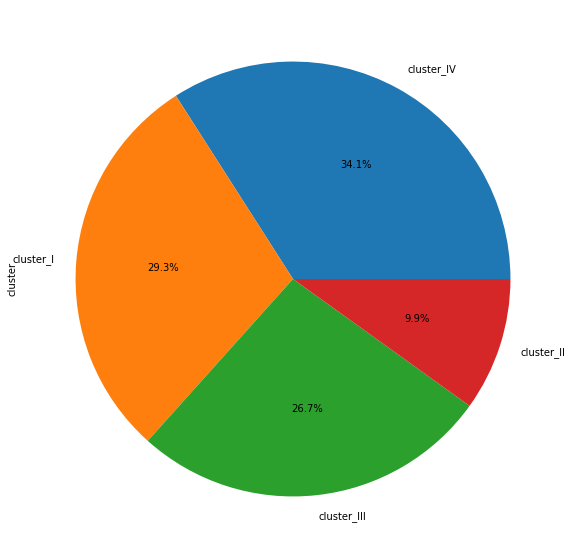

In [17]:
import pandas as pd 


df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/data/clusters_nc.tsv", sep="\t")

ax = df.cluster.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query nifH sequences from [Zehr lab](https://www.jzehrlab.com/nifh)

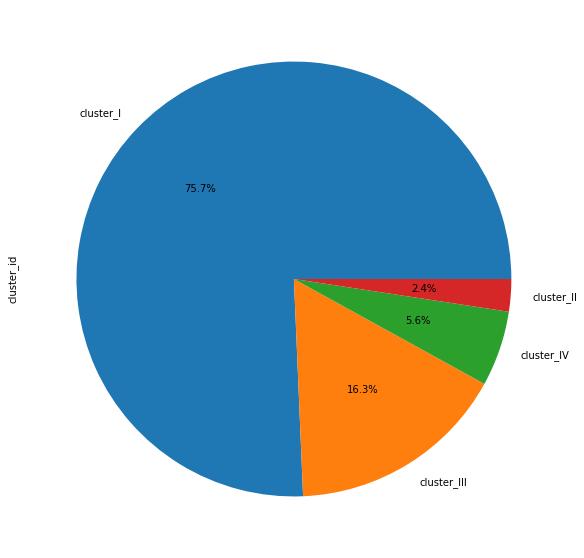

In [9]:
import pandas as pd


df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/arbitrator/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query sequences from SwissProt

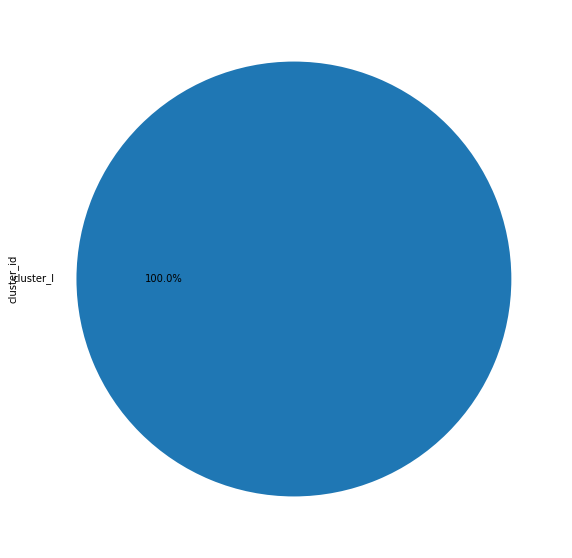

In [10]:
df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/uniprot/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query sequences from Narraganset bay (Nuria)

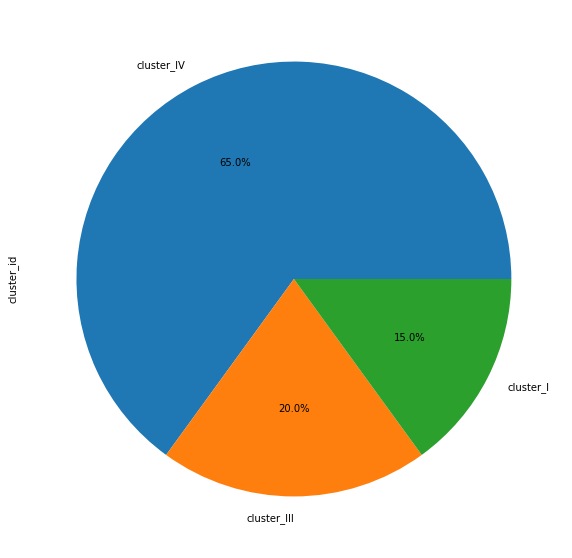

In [11]:
df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/envision_nuria/results_bay/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query sequences from Envision (Nuria)

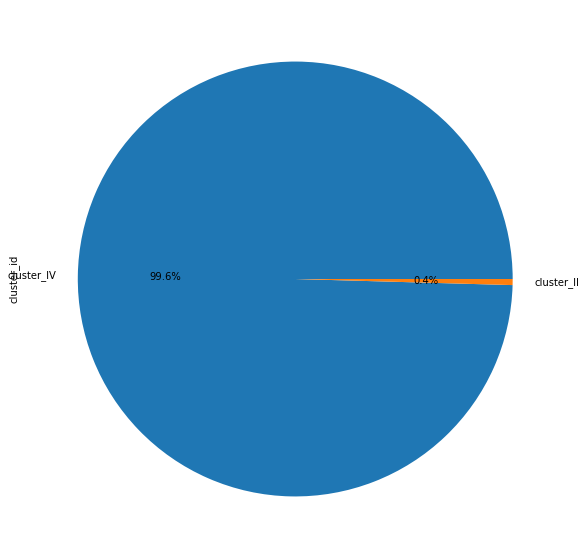

In [12]:
df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/envision_nuria/results_envis/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query sequences from Malaspina (Juan)

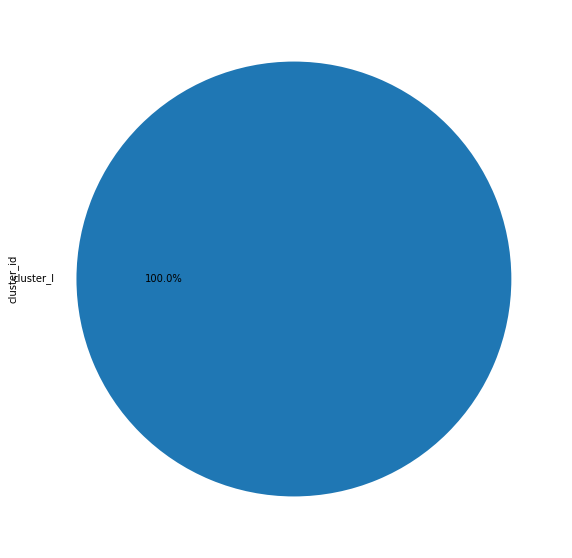

In [13]:
df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/malaspina/results/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

# Main issue

SqueezeMeta's nifH ORFs don't pass the --cut_nc or --cut_ga filter. They are almost all assigned to cluster IV. Actually the ones that pass the filter are assigned to clusters I-III.

Zehr lab sequences that pass the --cut_nc filter are assigned to clusters I-III well, and so are swissprot sequences.

1. Build nifH tree using -E 1e-10 as filter during database build. Results in most tree sequences assigned to cluster IV

2. Filter directly environmental sequences with hmmsearch and --cut_nc? José says that --cut_nc cannot be employed in peptide fragments. Is it, though?

3. Reassign some/all cluster IV sequences to a functional "nifH" cluster. How?

# SqueezeMeta prefiltering

Using HMMER3 with cutoff -E 1e-10

## Run HMMER3 on prefiltered nifH sequences (SqueezeMeta's)

In [ ]:
%%bash 

hmmsearch \
    --tblout /home/robaina/Documents/TRAITS/genes/nifH/meeting/envis_cutga_TIGR01287.1.HMM.txt \
    --cut_ga --cpu 15 /home/robaina/Databases/hmm_PGAP/TIGR01287.1.HMM genes/nifH/nuria/envis_nifH.faa

hmmsearch \
    --tblout /home/robaina/Documents/TRAITS/genes/nifH/meeting/envis_cutnc_TIGR01287.1.HMM.txt \
    --cut_nc --cpu 15 /home/robaina/Databases/hmm_PGAP/TIGR01287.1.HMM genes/nifH/nuria/envis_nifH.faa

hmmsearch \
    --tblout /home/robaina/Documents/TRAITS/genes/nifH/meeting/envis_E_TIGR01287.1.HMM.txt \
    -E 1e-10 --cpu 15 /home/robaina/Databases/hmm_PGAP/TIGR01287.1.HMM genes/nifH/nuria/envis_nifH.faa

In [8]:
from phyloplacement.database.manipulation import parseHMMsearchOutput


results_dir = "/home/robaina/Documents/TRAITS/genes/nifH/meeting"

hmmer_hits_ga = parseHMMsearchOutput(results_dir + "/envis_cutga_TIGR01287.1.HMM.txt")
hmmer_hits_nc = parseHMMsearchOutput(results_dir + "/envis_cutnc_TIGR01287.1.HMM.txt")
hmmer_hits_E = parseHMMsearchOutput(results_dir + "/envis_E_TIGR01287.1.HMM.txt")

hmmer_hits_E

,id,bias,bitscore,description
0,megahit_2298240_867-1718,0.3,260.4,-
1,megahit_5396459_30786-31673,0.1,260.2,-
2,megahit_3917417_511-1407,0.1,247.2,-
3,megahit_29059496_6408-7301,0.1,242.3,-
4,megahit_9844308_140875-141771,0.1,239.2,-
...,...,...,...,...
262,megahit_911823_836-1612,0.2,50.4,-
263,megahit_22191343_3493-4275,0.2,50.3,-
264,megahit_2739299_6261-7043,0.9,50.3,-
265,megahit_3908970_2180-2971,0.9,50.3,-


## RESULT

Sequences prefiltered by SqueezeMeta don't pass the --cut_ga or --cut_nc filters

# Rebuild nifH reference tree using SqueezeMeta's cutoff (-E 1e-10)

Sequences in the new model also classified with the same CART model (adjusted for the new alignment)

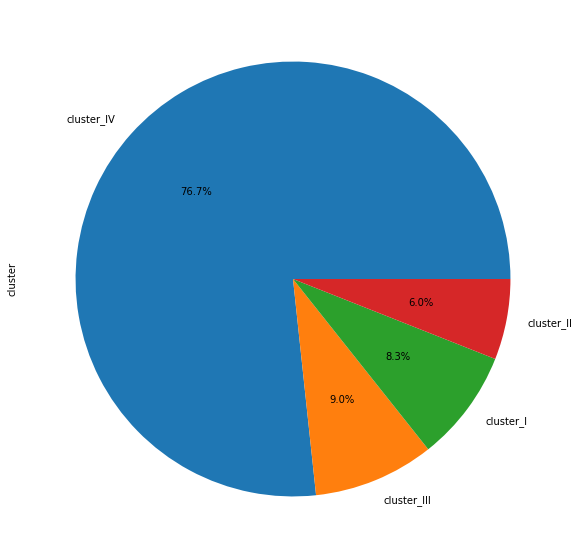

In [21]:
import pandas as pd 


df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/data/clusters.tsv", sep="\t")

ax = df.cluster.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')

## Query sequences from Envision placed on new nifH tree (-E 1e-10)

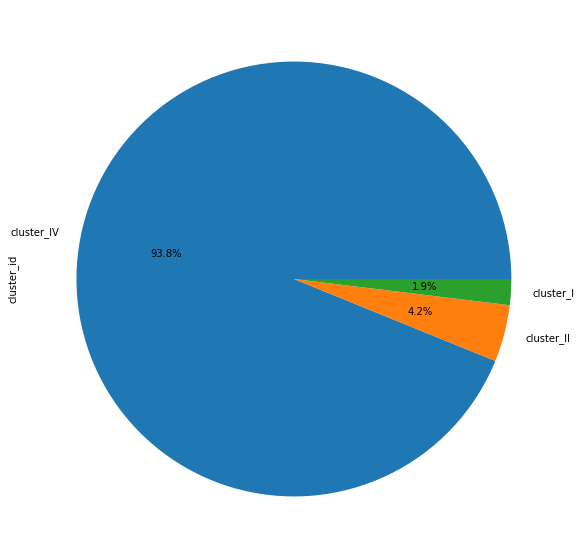

In [28]:
df = pd.read_csv("/home/robaina/Documents/TRAITS/genes/nifH/envision_nuria/results_E/placed_tax_assignments.tsv", sep="\t")
ax = df.cluster_id.value_counts().plot.pie(y="cluster_id", figsize=(10, 10), autopct='%1.1f%%')